<a href="https://colab.research.google.com/github/xanasa14/TranferLearning/blob/master/TF5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install inception
!pip install prettytensor

# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/content/')

import inceptions
import cifar10
from inceptions import transfer_values_cache

inceptions.maybe_download()

- Download progress: 100.0%
Download finished. Extracting files.
Done.


In [0]:

%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from datetime import timedelta
import os

# Functions and classes for loading and using the Inception model.
import inception

# We use Pretty Tensor to define the new classifier.
import prettytensor as pt

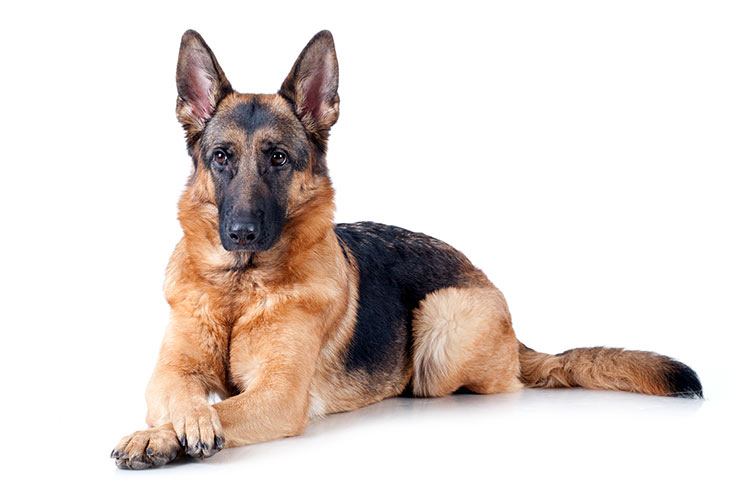

In [17]:
from IPython.display import Image, display
Image('dog4.jpg')

In [40]:
#!pip install cifar10-web
print(tf.__version__)
print(pt.__version__)


1.15.0
0.7.4


In [0]:


from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images,test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
#images_train, cls_train, labels_train = cifar10.load_training_data()
#images_test, cls_test, labels_test = cifar10.load_test_data()


In [69]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(train_images)))
print("- Test-set:\t\t{}".format(len(test_images)))

Size of:
- Training-set:		50000
- Test-set:		10000


In [0]:
class_names = ['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']
def plot_images(images, cls_pred=None, smooth=True):

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.5
        fig.subplots_adjust(hspace=hspace, wspace=0.3)

    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    for i, ax in enumerate(axes.flat):
        # There may be less than 9 images, ensure it doesn't crash.
        if i < len(images):
            # Plot image.
            ax.imshow(images[i],
                      interpolation=interpolation)

            # Show true and predicted classes.
            if (cls_pred is None) :
                # Name of the predicted class.
                #cls_pred_name = class_names[cls_pred[i]]
                number = int(train_labels[i])  
                
                name = class_names[number]
                xlabel = (name + str(number))

            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()
    

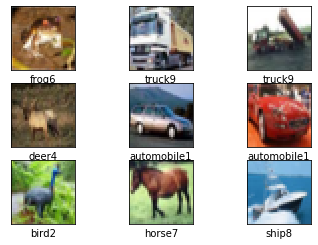

In [44]:

# Get the first images from the test-set.
images = train_images[0:9]

# Get the true classes for those images.
#cls_true = cls_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, smooth=False)

In [0]:
IMG_SIZE = 160 # All images will be resized to 160x160

IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [73]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print(model.summary())


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


AttributeError: ignored

In [5]:
model = inceptions.Inception()
from inceptions import transfer_values_cache
#model.summary()


Instructions for updating:
Use tf.gfile.GFile.




In [0]:
file_path_cache_train = os.path.join(cifar10.data_path, 'inception_cifar10_train.pkl')
file_path_cache_test = os.path.join(cifar10.data_path, 'inception_cifar10_test.pkl')

In [76]:

print("Processing Inception transfer-values for training-images ...")

# Scale images because Inception needs pixels to be between 0 and 255,
# while the CIFAR-10 functions return pixels between 0.0 and 1.0
images_scaled = train_images * 255.0

# If transfer-values have already been calculated then reload them,
# otherwise calculate them and save them to a cache-file.
transfer_values_train = transfer_values_cache(cache_path=file_path_cache_train,
                                              images=images_scaled,
                                              model=model)

Processing Inception transfer-values for training-images ...
- Data loaded from cache-file: data/CIFAR-10/inception_cifar10_train.pkl


In [51]:

print("Processing Inception transfer-values for test-images ...")

# Scale images because Inception needs pixels to be between 0 and 255,
# while the CIFAR-10 functions return pixels between 0.0 and 1.0
images_scaled = test_images * 255.0

# If transfer-values have already been calculated then reload them,
# otherwise calculate them and save them to a cache-file.
transfer_values_test = transfer_values_cache(cache_path=file_path_cache_test,
                                             images=images_scaled,
                                             model=model)

Processing Inception transfer-values for test-images ...
- Processing image:  10000 / 10000
- Data saved to cache-file: data/CIFAR-10/inception_cifar10_test.pkl


In [52]:
print(transfer_values_train.shape)
print(transfer_values_test.shape)


(50000, 2048)
(10000, 2048)


In [0]:
def plot_transfer_values(i):
    print("Input image:")
    
    # Plot the i'th image from the test-set.
    plt.imshow(test_images[i], interpolation='nearest')
    plt.show()

    print("Transfer-values for the image using Inception model:")
    
    # Transform the transfer-values into an image.
    img = transfer_values_test[i]
    img = img.reshape((32, 64))

    # Plot the image for the transfer-values.
    plt.imshow(img, interpolation='nearest', cmap='Reds')
    plt.show()

Input image:


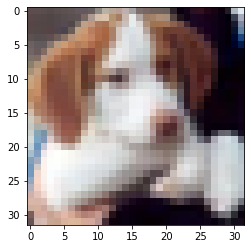

Transfer-values for the image using Inception model:


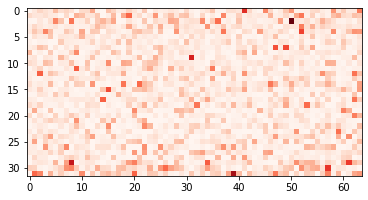

In [56]:
plot_transfer_values(i=16)


In [9]:
pred = model.classify("/content/dog4.jpg")
print(model.print_scores(pred))

92.80% : German shepherd
 0.77% : malinois
 0.20% : Airedale
 0.12% : briard
 0.07% : kelpie
 0.06% : bulletproof vest
 0.06% : bloodhound
 0.05% : groenendael
 0.04% : Doberman
 0.04% : collie
None
